#  Telecom Churn Prediction

Customers are the most important resources for any companies or businesses. What if these customers leave the company due to high charges, better competitor offers, poor customer services or something unknown? Hence, Customer churn rate is one of the important metrics for companies to evaluate their performance.

Customer churn rate is a KPI to understand the leaving customers. Churn rate represents the percentage of customers that company lost over all the customers at the beginning of the interval.

For example, If company had 400 customers at the beginning of the month and only 360 at the end of the month, means company’s churn rate is 10%, because company lost 10% of the customer base. Companies always try to minimize the churn rate to as close as 0%.

## Table of contents
### 1) Introduction

* Dataset, features and target value
* Problem description

### 2) Descriptive analysis and EDA (Exploratory Data Analysis)

* Churn rate and Correlation between features
* Profile of Churn vs Existing customers
* Tenure and Monthly charges distribution

### 3) Cluster analysis

* Churn cluster detection
* Churn customer cluster analysis – by Demographic, Account type and Service Usage

### 4) Churn customer prediction model

* Prediction model process
* Model evaluation

### 5) Retention plan


In [1]:
__author__ = "Eduardo Oreamuno"
__email__ = "eoaparicio@yahoo.com"

### 1. Introduction

Dataset, Features and Target value
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)

Here, IBM provided customer data for Telecom industry to predict churn customer based on demographic, usage and account based information. Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention. Assumption — Here, data source has not provided any information related to time; So I have assumed that all the records are specific to the particular month.

Dataset has information related to,

Demographic:
* Gender - Male / Female
* Age range - In terms of Partner, Dependent and Senior Citizen

Services:
* Phone service - If customer has Phone service, then services related to Phone like;
    * Multiline Phone service
* Internet Service - If customer has Internet service, then services related to Internet like;
    * Online security
    * Online backup
    * Device protection
    * Tech support
    * Streaming TV
    * Streaming Movies

Account type:
* Tenure - How long customer is with the company?
* Contract type - What kind of contract they have with a company? Like
    * Monthly bases
    * On going bases - If on going bases, then One month contract or Two year contract
* Paperless billing - Customer is paperless billion option or not?
* Payment method - What kind of payment method customer has?
    * Mailed check
    * Electronic check
    * Credit card (Automatic)
    * Bank transfer (Automatic)

Usage:
* Monthly charges
* Total charges
Target:
* Churn - Whether customer left the company or still with the company?

### Problem Description

* Why customers leaving the company?
The reasons behind the customer leaving company could be

    * High charges
    * Better offer from competitor
    * Poor customer service
    * Some unknown reasons


* How to detect the churn customer?
    * Monitoring usage
    * Analysing complains
    * Analyzing competitors offers


* How to prevent customers from leaving a company?
    * Once you detect high risk customers, apply


* Retention plans
    * Improve customer service

### 2. Descriptive analysis and EDA (Exploratory Data Analysis)

Here, I have explored data, features and tried to have some intuition about them.

### Load libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath)
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [4]:
data_file = 'Telco-Churn.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.head(10)

Data object initiated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Dimensionality & Sanity check

In [5]:
df_raw.shape

(7043, 21)

Dataset has **7043 observations** and **21 features**

In [6]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking missing / NULL values

df_raw.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
# Duplicate value check

df_raw.duplicated().any()

False

In [9]:
# Exploring data types of each feature

df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We need to rename columns into proper format and need to transform columns like Partner, Dependents and so on to similar format for furture analysis.

Also, need to change data type of TotalCharges to float.

### Data transformation & Renaming

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [10]:
def Data_transformation_renaming(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()
    
    df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})
    
    # Data mining
    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']
    

    return df_cal    

In [11]:
df_cal = Data_transformation_renaming(df_raw)

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [12]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

### Descriptive statistics

In [13]:
df_cal[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [14]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is **32 months, 64 dollars and 2282 dollars**, respectively.

In [15]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

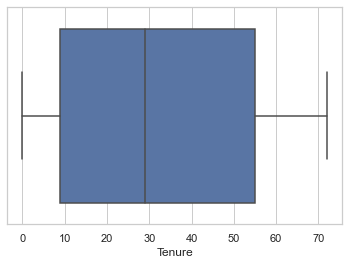

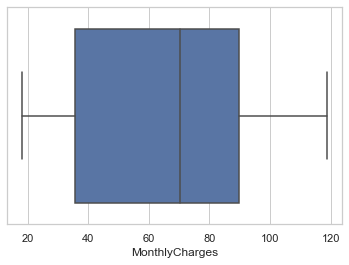

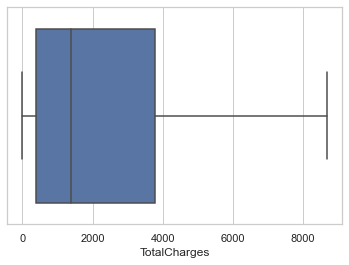

In [16]:
for i in num_cols:
    Outlier_boxplot(df_cal,i)

Box plot graphs shows that **none** of the numerical columns have outliers.

In [17]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

### Calculate Churn Rate

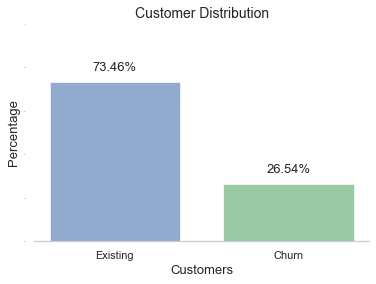

0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [18]:
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

### Correlation

In [19]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

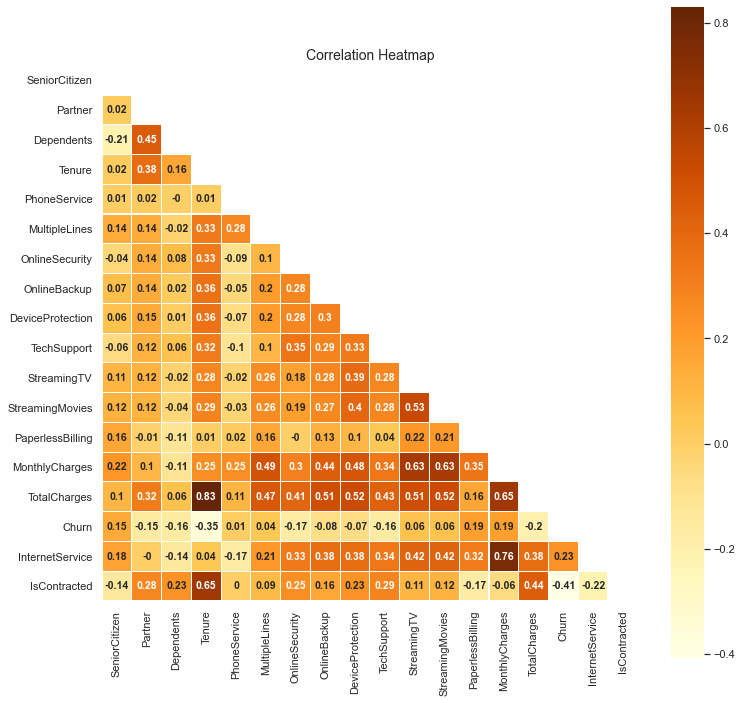

In [20]:
var_corr = round(df_cal.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like **tenure, Monthly charges and Total charges** are highly correlated with services like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

### Distribution of features as per Churn

#### Distribution of categorical and binary variables

In [21]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , palette = plotColor
                , alpha = 0.6)
        
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
            
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()            

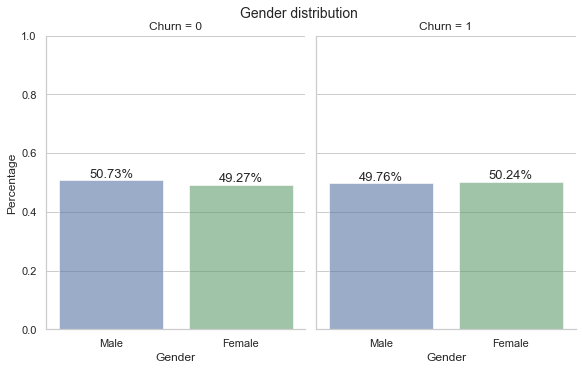

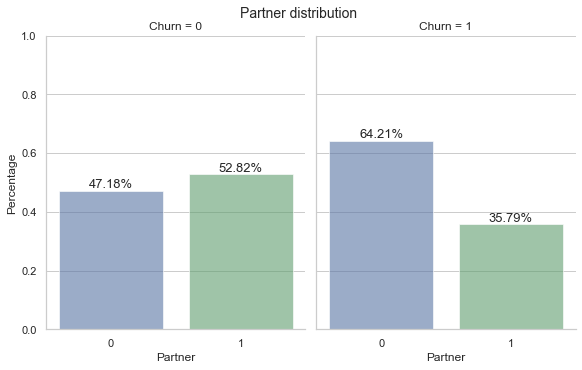

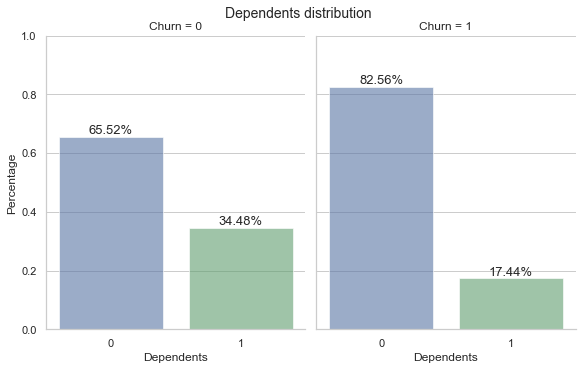

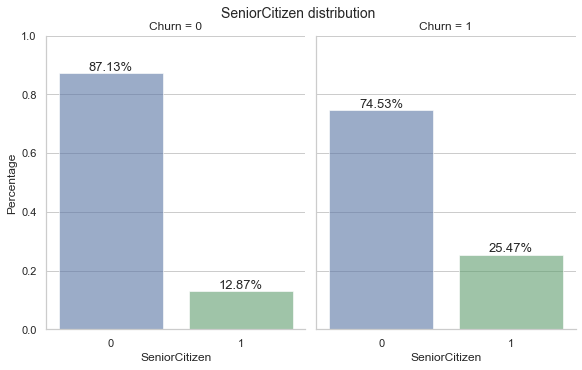

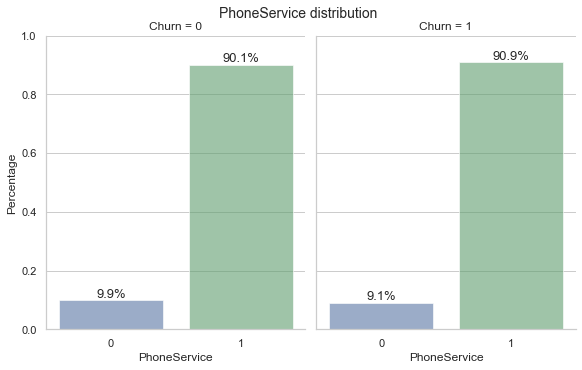

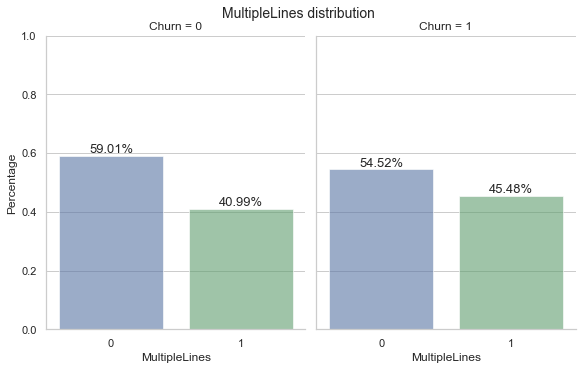

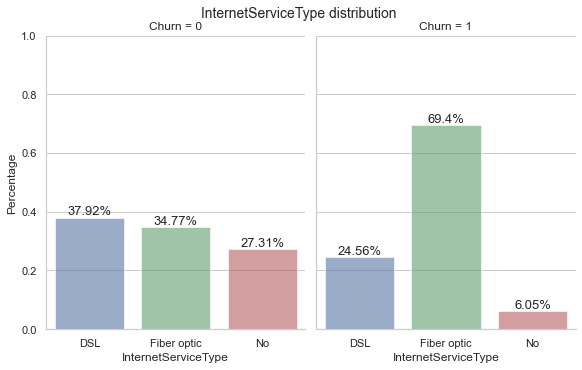

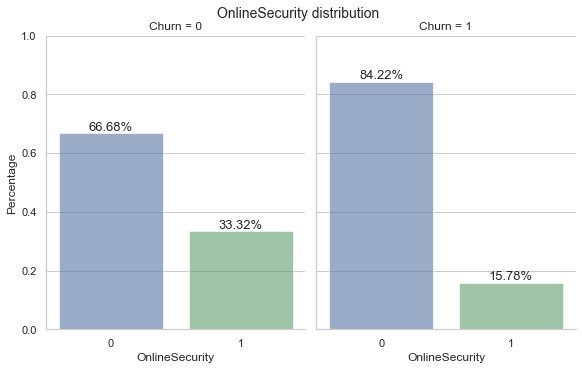

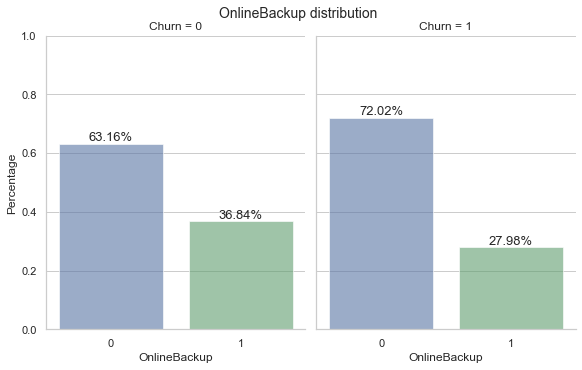

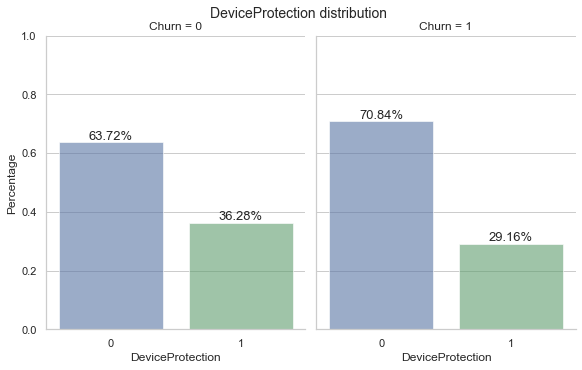

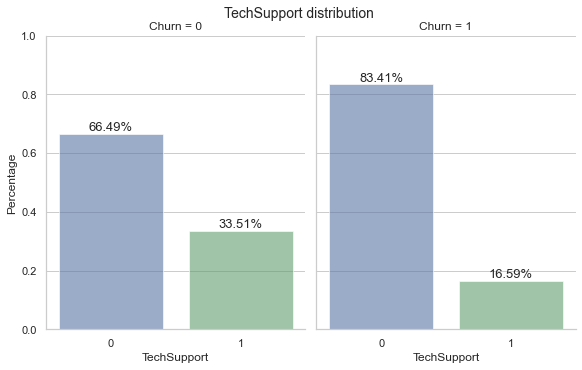

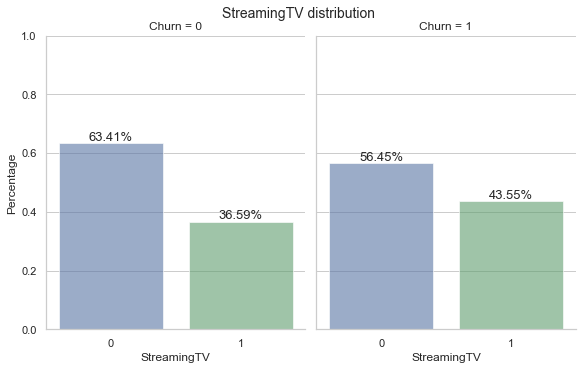

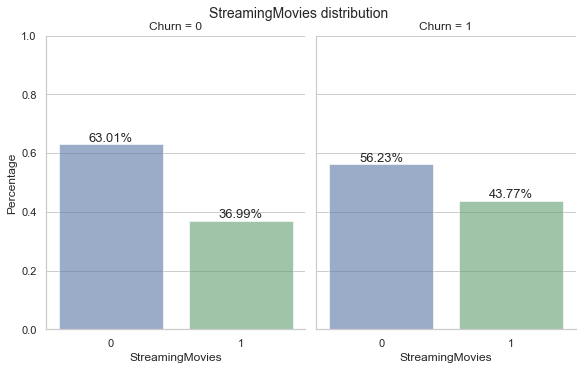

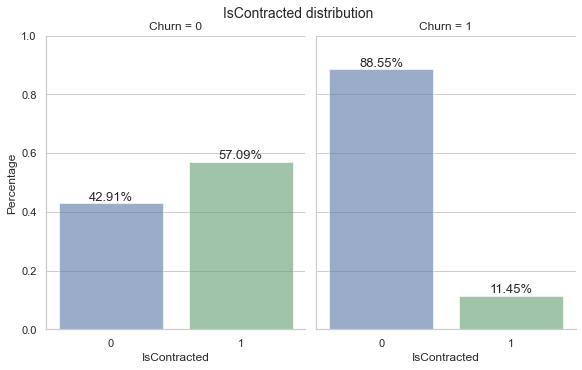

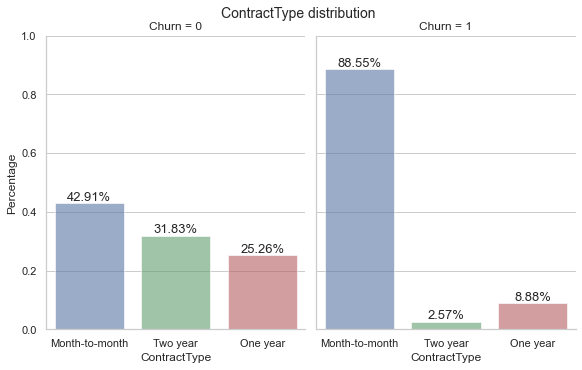

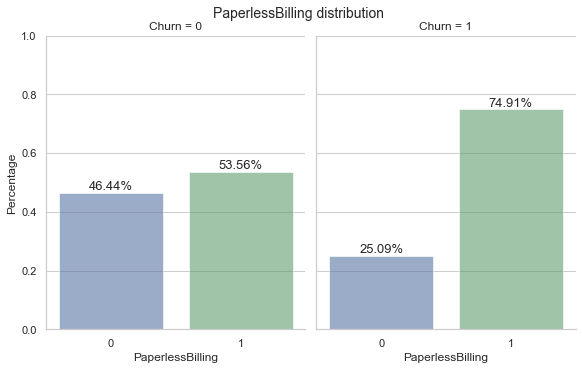

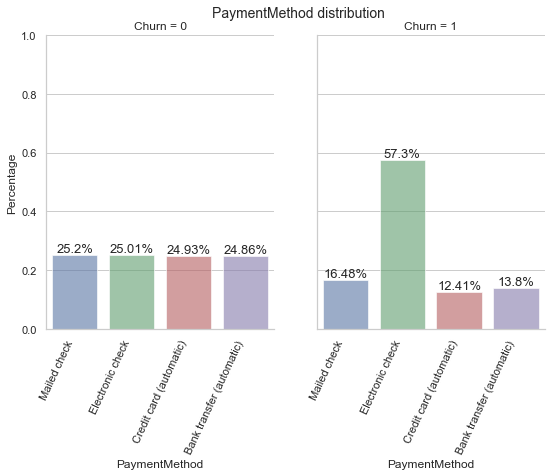

In [22]:
churn_summary = df_cal.groupby('Churn')
Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

From above analysis, churn customers are likely to

* not have partners and Dependents; Means likely to be Single.
* have Internet service and specifically Fiber optics
* not have online security service, online backup service, device protection service, Tech support service
* have streaming TV and streaming Movies services
* be with monthly based contract
* have paperless billing service
* have electronic check payment method

### Distribution of Tenure, Monthly Charges and Total Charges

In [23]:
# Mean summary of customers (Churn vs Non churn)
print(churn_summary['Tenure','MonthlyCharges','TotalCharges'].mean())

          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


<ipython-input-23-b920bdf5f730>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(churn_summary['Tenure','MonthlyCharges','TotalCharges'].mean())


Result shows that Churn customers have more Monthly charges compared to existing customers.
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

Let's check distribution of each features with target variable.

#### Tenure vs Churn Distribution

In [24]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No chrun')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

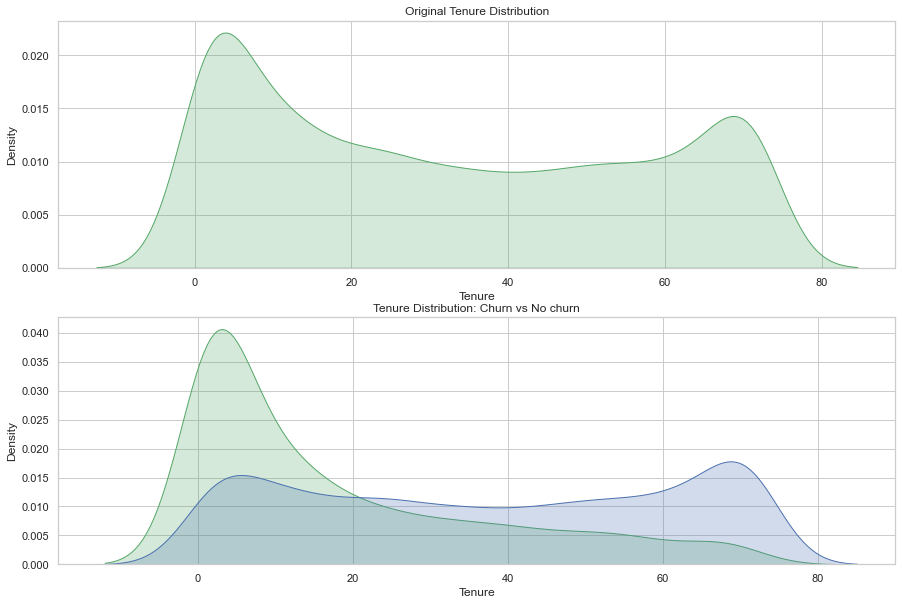

In [25]:
Numerical_distribution(df_cal,'Tenure')

#### MonthlyCharges vs Churn Distribution

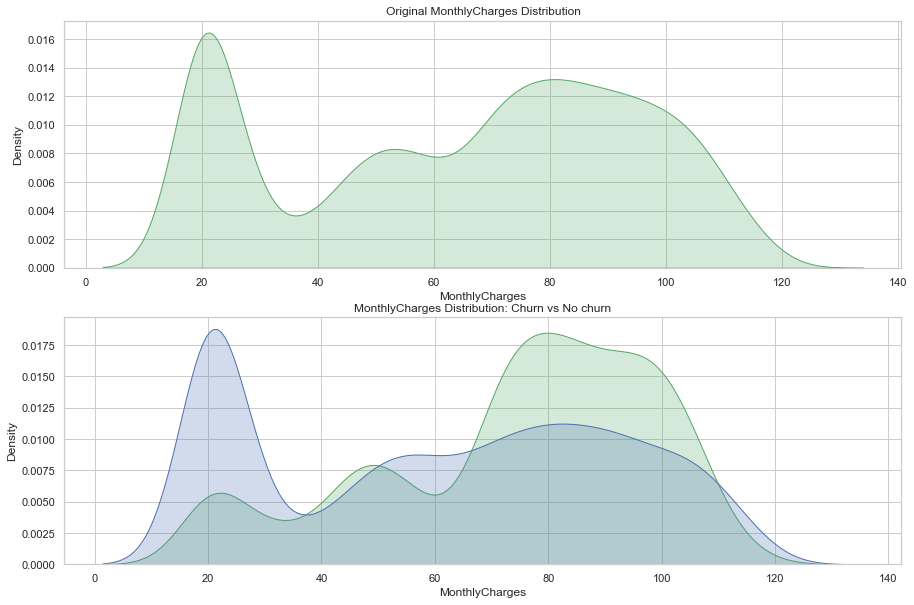

In [26]:
Numerical_distribution(df_cal,'MonthlyCharges')

#### TotalCharges vs Churn Distribution

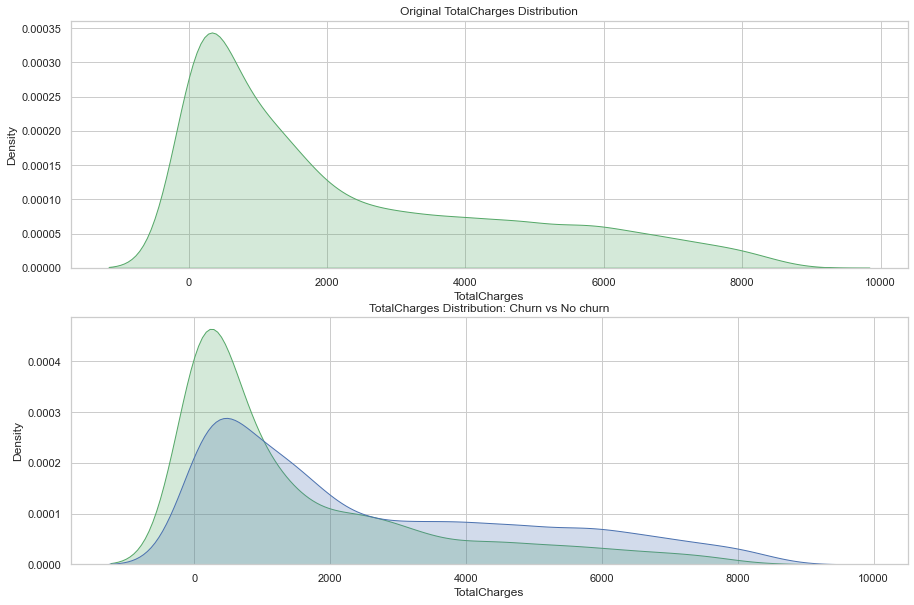

In [27]:
Numerical_distribution(df_cal, 'TotalCharges')

From above distribution, churn subscribers are

* more likely to leave company who's tenure is less than a year
* more likely to have more than $65 monthly charges 

## 3. Cluster Analysis

Let's check is there any relationship between Tenure and MonthlyCharges.

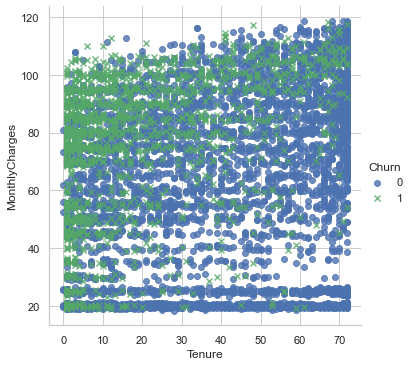

In [28]:
sns.lmplot(x='Tenure'
           ,y='MonthlyCharges'
           ,data=df_cal
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

**From the analysis, there are some clusters based on Tenure and Monthly Charges.**

Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize Tenure and Monthly Charges.

In [29]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [30]:
# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = Normalize_feature(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = Normalize_feature(df_cal[['MonthlyCharges']])
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.50,0,1,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,-1.236724,0.197365


In [31]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

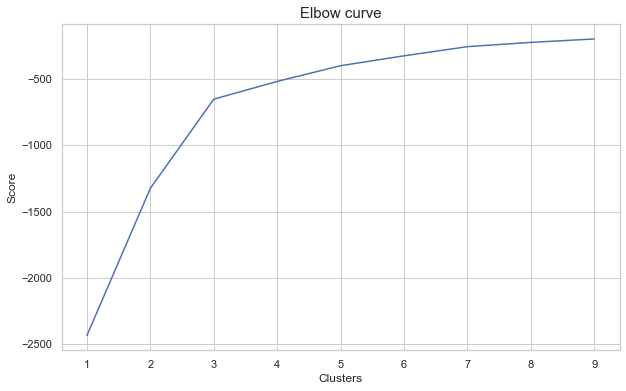

In [32]:
# checking number of clusters

Create_elbow_curve(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

From Elbow curve, 3 seems most efficient.

In [33]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Churn==1][[x_title+'_norm', y_title +'_norm']])    

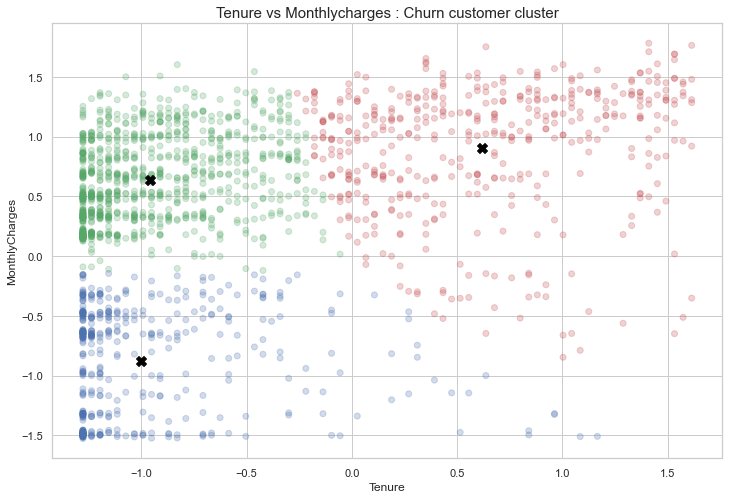

array([-1,  2,  0,  1], dtype=int64)

In [34]:
df_cal['Cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.Churn==1),'Cluster'] = Create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer cluster")

df_cal['Cluster'].unique()

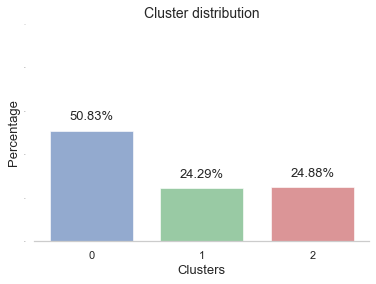

In [35]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = plotColor)

Based on K-means cluster graph, we can see that there are three groups.

* Low Tenure and High Monthly Charges (Green cluster)
* High Tenure and High Monthly Charges (Red cluster)
* Low Tenure and Low Monthly Charges (Blue cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

Let's check there average Tenure and Monthly Charges by cluster.

In [36]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp['Tenure','MonthlyCharges'].mean())

            Tenure  MonthlyCharges
Cluster                           
0         8.805263       83.795000
1        47.592511       91.855837
2         7.808602       38.329140


<ipython-input-36-d4b955dd4d3e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_cluster_gp['Tenure','MonthlyCharges'].mean())


Based on demographic/usage/account related information, I have tried to explore characteristics of churn customer by each cluster.

For example, in overall churn customer, percentage of female is 50.2%. And in cluster 2 ( Low tenure and high monthly charges), percentage of female is 53.15%. Meaning female are more likely to leave company due to high monthly charges and lower tenure.

Using this technique, I have explored other variables too.

In [39]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, tenure_charges_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    df = df_cal.copy()
    feature_churn_dist = df[(df['Churn']==1)][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature,'Percentage']
    #print(feature_churn_dist)
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    tenure_MonthlyCharges_df = df_cal[df_cal['Churn']==1].groupby(['Cluster',feature],as_index=False)[['Tenure','MonthlyCharges']].mean()
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    tenure_charges_cluster_df = tenure_charges_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("Not have a "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Percentage': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_Tenure': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['Tenure'].values[0],2)
                            , 'Avg_MonthlyCharges': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['MonthlyCharges'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(tenure_charges_cluster_df)])
                        )

    return tenure_charges_cluster_df                    

In [40]:
tenure_charges_cluster_df = pd.DataFrame()

for feature in ['Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetServiceType'
       ,'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','ContractType'
       ,'PaperlessBilling','PaymentMethod','InternetService']:
        tenure_charges_cluster_df = Extract_highest_in_cluster(df_cal, df_cluster_gp, feature,tenure_charges_cluster_df)

#### Cluster 1 - Low Tenure and Low Monthly Charges

In [41]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==0]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
0,Gender,Female,0.531579,0,8.47,83.47,1,Female
3,SeniorCitizen,Have a SeniorCitizen,0.274737,0,9.67,84.56,1,SeniorCitizen
6,Partner,Not have a Partner,0.701053,0,7.94,83.28,0,Partner
9,Dependents,Not have a Dependents,0.860000,0,8.56,83.91,0,Dependents
12,PhoneService,Have a PhoneService,1.000000,0,8.81,83.80,1,PhoneService
15,MultipleLines,Have a MultipleLines,0.492632,0,10.57,87.30,1,MultipleLines
18,InternetServiceType,Fiber optic,0.956842,0,8.69,84.47,1,Fiber optic
22,OnlineSecurity,Not have a OnlineSecurity,0.892632,0,8.30,83.39,0,OnlineSecurity
25,OnlineBackup,Not have a OnlineBackup,0.776842,0,7.94,82.29,0,OnlineBackup
28,DeviceProtection,Not have a DeviceProtection,0.749474,0,8.07,81.48,0,DeviceProtection


#### Cluster 2 - Low Tenure and High Monthly Charges

In [42]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
1,Gender,Male,0.519824,1,49.25,92.21,1,Male
4,SeniorCitizen,Have a SeniorCitizen,0.332599,1,46.03,92.03,1,SeniorCitizen
7,Partner,Have a Partner,0.594714,1,49.23,92.24,1,Partner
10,Dependents,Have a Dependents,0.222467,1,48.75,90.94,1,Dependents
13,PhoneService,Have a PhoneService,0.951542,1,47.28,93.93,1,PhoneService
16,MultipleLines,Have a MultipleLines,0.748899,1,48.33,96.74,1,MultipleLines
19,InternetServiceType,Fiber optic,0.854626,1,47.16,96.70,1,Fiber optic
23,OnlineSecurity,Have a OnlineSecurity,0.286344,1,50.43,93.32,1,OnlineSecurity
26,OnlineBackup,Have a OnlineBackup,0.539648,1,50.72,94.15,1,OnlineBackup
29,DeviceProtection,Have a DeviceProtection,0.537445,1,49.98,96.36,1,DeviceProtection


#### Cluster 3 - High Tenure and High Monthly Charges

In [43]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
2,Gender,Male,0.535484,2,7.73,38.82,1,Male
5,SeniorCitizen,Not have a SeniorCitizen,0.862366,2,7.72,38.33,0,SeniorCitizen
8,Partner,Not have a Partner,0.752688,2,6.31,38.52,0,Partner
11,Dependents,Have a Dependents,0.197849,2,9.61,38.21,1,Dependents
14,PhoneService,Not have a PhoneService,0.318280,2,10.19,35.52,0,PhoneService
17,MultipleLines,Not have a MultipleLines,0.909677,2,7.31,37.50,0,MultipleLines
20,InternetServiceType,DSL,0.756989,2,7.67,44.10,1,DSL
21,InternetServiceType,No,0.243011,2,8.24,20.37,0,No
24,OnlineSecurity,Not have a OnlineSecurity,0.864516,2,7.32,36.76,0,OnlineSecurity
27,OnlineBackup,Not have a OnlineBackup,0.858065,2,7.16,37.12,0,OnlineBackup


### Graphical representation of clusters

In [46]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    
    #print(data.head().T)
    #print(cluster_visualize_gp.head().T)
    
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_Tenure'][i]
                                , cluster_visualize_gp['Avg_MonthlyCharges'][i]
                                , txt
                                , fontsize = 13
                                , weight="bold"))
        ax.scatter(x=cluster_visualize_gp['Avg_Tenure'][i]
            , y=cluster_visualize_gp['Avg_MonthlyCharges'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))

    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')        
    #adjust_text(annotations
    #            ,x=cluster_visualize_gp['Avg_Tenure']
    #            ,y=cluster_visualize_gp['Avg_MonthlyCharges'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()                

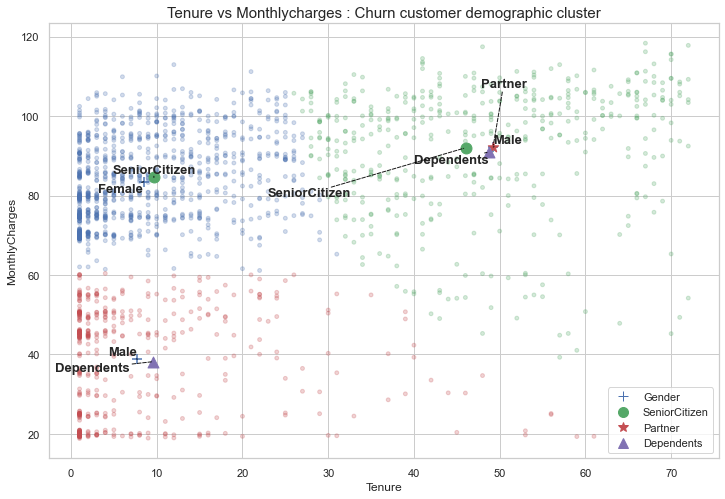

In [47]:
cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'Gender')
                            | (tenure_charges_cluster_df['Category'] == 'SeniorCitizen')
                            | (tenure_charges_cluster_df['Category'] == 'Partner')
                            | (tenure_charges_cluster_df['Category'] == 'Dependents'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer demographic cluster")

In [48]:
import sys 
!{sys.executable} --version

Python 3.8.5


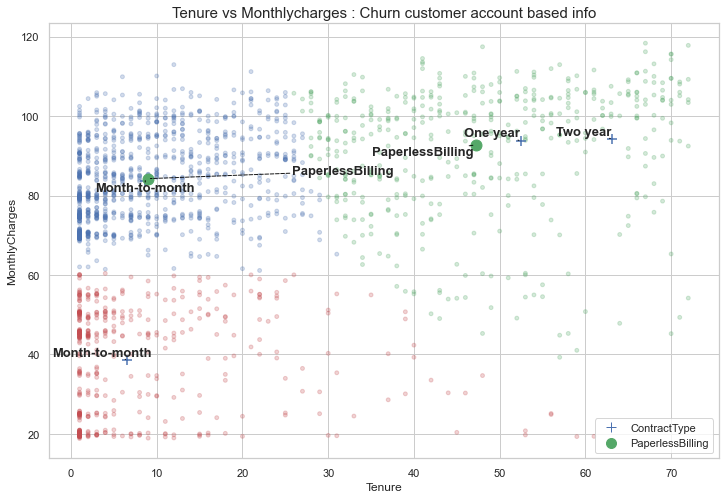

In [49]:
cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'ContractType')
                            | (tenure_charges_cluster_df['Category'] == 'PaperlessBilling')
                            | (tenure_charges_cluster_df['Category'] == 'PaymentMethods'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer account based info")

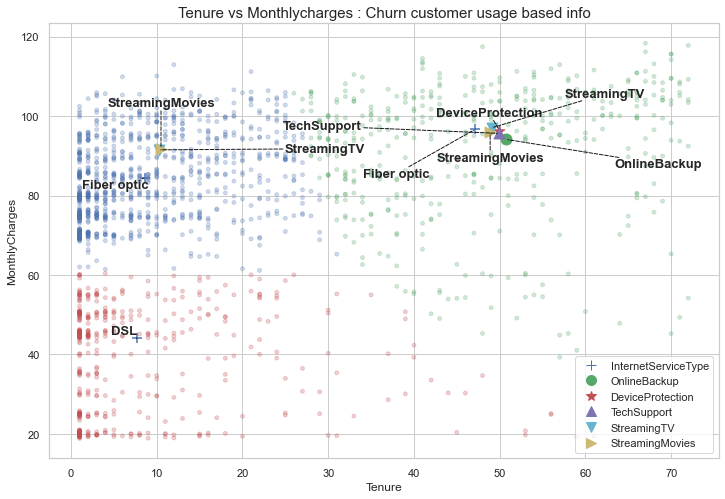

In [50]:

cluster_with_label_gp = tenure_charges_cluster_df[(tenure_charges_cluster_df['Represent_in_graph']==1) 
                          & ((tenure_charges_cluster_df['Category'] == 'StreamingTV')
                            | (tenure_charges_cluster_df['Category'] == 'StreamingMovies')
                            | (tenure_charges_cluster_df['Category'] == 'TechSupport')
                            | (tenure_charges_cluster_df['Category'] == 'DeviceProtection')
                            | (tenure_charges_cluster_df['Category'] == 'OnlineSupport')
                            | (tenure_charges_cluster_df['Category'] == 'OnlineBackup')
                            | (tenure_charges_cluster_df['Category'] == 'InternetServiceType'))]

Create_kmeans_cluster_with_label(df_cal[df_cal.Churn==1][['Tenure','MonthlyCharges','Cluster']]
                            ,cluster_with_label_gp.reset_index()
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer usage based info")

## 4. Churn customer prediction model

### Data preprocessing

In [51]:
df_model = Data_transformation_renaming(df_raw)
df_model.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


#### Train & Test data split

In [52]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [53]:
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (7043, 28)
Original target shape,  (7043,)
x train shape,  (5634, 28)
y train shape,  (5634,)
x test shape,  (1409, 28)
y test shape,  (1409,)
----------------------------


#### Class imbalance

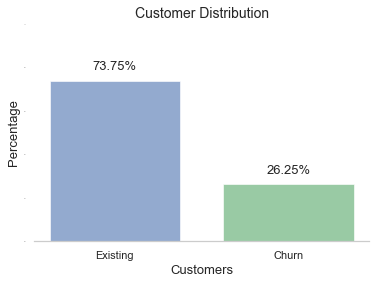

In [54]:
# Distribution in train dataset

Churn_rate = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

Here, our training model has class imbalance issue due to inequality in data distribution.

#### Upsampling the train data

In [55]:
# Upsampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train,y_train)

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (5634, 28)
Resample x train shape,  (8310, 28)
----------------------------


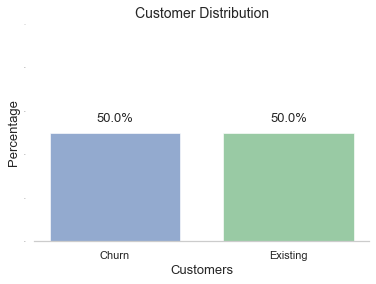

In [56]:
# After upsampling distribution in train dataset

Churn_rate = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

#### Model Development

Here, I have used Logistic regression, Random forest and Gradient boosting models to predict churn customers and compared which model works better for our dataset. Also, analyzed original dataset and upsampling data for all these models.

## Hypterparameter Tunning

Based on original and Upsampling data, tunned hyperparameter for our traing data for all three models.

In [57]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [60]:
clsModelsNm = ["Logistic Regression", "Random Forest", "Gradient boosting"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 50]  # antes de 50 era 100
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

In [62]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression


D:\Personal\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.41335093         nan -0.41306317         nan -0.41309643
         nan -0.41316289         nan -0.41320309         nan -0.41322231
         nan -0.41324085         nan -0.41326537]
  warnings.warn(


-0.4130631733303952
{'C': 0.5, 'penalty': 'l2'}
Random Forest
-0.4104582918070695
{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 20, 'n_estimators': 200}
Gradient boosting
-0.4055579360049357
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 1.0, 'n_estimators': 150, 'subsample': 1}


In [63]:
#### Upsampling data

In [64]:
clsLR_sm = LogisticRegression(random_state = random_state)
clsRF_sm = RandomForestClassifier(random_state = random_state)
clsGB_sm = GradientBoostingClassifier(random_state = random_state)

clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

tuned_params_sm = Parameter_tunning(x_train_sm, y_train_sm, clsModels_sm, clsModelsNm, clsParams , 'neg_log_loss')

Logistic Regression


D:\Personal\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.42829043         nan -0.4066383          nan -0.40052758
         nan -0.39513619         nan -0.3939753          nan -0.39313791
         nan -0.39335727         nan -0.39437925]
  warnings.warn(
D:\Personal\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.3931379082652042
{'C': 15, 'penalty': 'l2'}
Random Forest
-0.3567377600124968
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}
Gradient boosting
-0.380465116993766
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 0.7}


### Model Comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, 
I have compared different metrics and try to find best threshold value with lower log loss score.

Intuition process -

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [ ]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )

#### Original data

In [ ]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 15
                              ,max_features = 'auto'
                              ,min_samples_leaf = 10
                              ,n_estimators = 150 )

                        
clsGB = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 150
                              , learning_rate = 0.05
                              , min_samples_leaf = 20 
                              , min_samples_split = 0.1
                              , subsample = 0.7)


clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(x_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

In [ ]:
# resample data


clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l1')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 20
                              , n_estimators = 200
                              , max_features = 'auto'
                              , min_samples_leaf = 1 )

clsGB_sm = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 100
                              , learning_rate = 0.2
                              , min_samples_leaf = 10 
                              , min_samples_split = 0.1
                              , subsample = 1)
                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(x_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation

Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [ ]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [ ]:

def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

### Original data

In [ ]:
Logistic_threshold = 0.31
Random_forest_threshold = 0.30
Gradient_boosting_threshold = 0.30

Model_evaluation(clsModels
                 , clsModelsNm
                 , x_train
                 , y_train
                 , x_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

### Upsampling data

In [ ]:
Logistic_threshold_sm = 0.37
Random_forest_threshold_sm = 0.46
Gradient_boosting_threshold_sm = 0.45

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , x_train_sm
                 , y_train_sm
                 , x_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

### Feature importance

In [ ]:
feature_importance = pd.Series(clsGB.feature_importances_, x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method, Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [ ]:
churn_customer_prob = pd.DataFrame({'Predicted_proba': clsGB.predict_proba(x_test)[:][:,1]
                                   , 'predicted': clsGB.predict(x_test)})
churn_customer_prob

### 5. Retention plan

Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [ ]:
existing_cust = df_model[df_model['Churn']==0]
existing_cust_feature ,existing_cust_target = Create_model_df(df_model[df_model['Churn']==0]
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [ ]:
existing_customer_churn_prob = clsGB.predict_proba(existing_cust_feature)

In [ ]:
existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

In [ ]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)

Define existing customers based on probability of churn;

In [ ]:
existing_cust.loc[existing_cust['Churn_proba'] >= 0.8 , 'Risk_type'] = 'Very high'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.6) & (existing_cust['Churn_proba'] < 0.8)  , 'Risk_type'] = 'High'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.4) & (existing_cust['Churn_proba'] < 0.6) , 'Risk_type'] = 'Medium'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.2) & (existing_cust['Churn_proba'] < 0.4) , 'Risk_type'] = 'Low'
existing_cust.loc[(existing_cust['Churn_proba'] > 0.0) & (existing_cust['Churn_proba'] < 0.2) , 'Risk_type'] = 'Very low'

In [ ]:
existing_cust['Risk_type'].value_counts()

In [ ]:
existing_cust['Risk_type'].value_counts().plot(kind = 'barh')
plt.title("Existing customer risk type distribution", fontsize=14)
plt.ylabel("Risk type", fontsize = 13)
plt.xlabel("Customers", fontsize = 13)

We can provide retension plans to high risk and very high risk type customers.

## Conclusion

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.